### Example:
- data cleaning
- feature creation
- feature engineering
- Sample data virtualization

In [5]:
# Read CSV file and print out the data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# file path
file_path = 'Motor_Vehicle_Registrations_Dashboard_data.csv'
df = pd.read_csv(file_path)
df.head()
df.info()   




/var/folders/lw/hkvdftyx63b6jwsqq4vjs80r0000gn/T/ipykernel_71919/1577662964.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6293 entries, 0 to 6292
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   year        6293 non-null   int64  
 1   state       6293 non-null   object 
 2   Auto        6171 non-null   float64
 3   Bus         6171 non-null   float64
 4   Truck       6171 non-null   float64
 5   Motorcycle  6171 non-null   float64
dtypes: float64(4), int64(1), object(1)
memory usage: 295.1+ KB
                state         Auto        Bus        Truck   Motorcycle
0             Alabama  133856303.0   627388.0   92790713.0   4212396.00
1              Alaska   10918541.0   138926.0   15574794.0    925482.00
2             Arizona  104484018.0   357016.0   77857755.0   5849978.66
3            Arkansas   62097096.0   472919.0   49675089.0   2476103.00
4          California  951791639.0  2831903.0  469557571.0  37981041.11
..                ...          ...        ...          ...          ..

In [23]:
#missing data
missing_values = df.isnull().sum()
print(missing_values,"\n")
missing_values_cols = missing_values[missing_values > 0]

print(missing_values_cols)

year            0
state           0
Auto          122
Bus           122
Truck         122
Motorcycle    122
dtype: int64 

Auto          122
Bus           122
Truck         122
Motorcycle    122
dtype: int64


In [24]:
# Fill missing values with mean for the specific columns
df['Auto'] = df['Auto'].fillna(df['Auto'].mean())
df['Bus'] = df['Bus'].fillna(df['Bus'].mean())
df['Truck'] = df['Truck'].fillna(df['Truck'].mean())
df['Motorcycle'] = df['Motorcycle'].fillna(df['Motorcycle'].mean())

# Save to a new CSV file
df.to_csv('Motor_Vehicle_Registrations_Dashboard_data_after_cleaing.csv', index=False)

In [13]:
file='Motor_Vehicle_Registrations_Dashboard_data_after_cleaing.csv'
df=pd.read_csv(file)
df.head()
df.info()
print("\n")
missing_values = df.isnull().sum()
print(missing_values)





df_cropped = df[(df['year'] >= 1920) & (df['year'] <= 2020)]
print(df_cropped)
# Assuming df_cropped is your cropped DataFrame
df_cropped.to_csv('cropped_data.csv', index=False)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6293 entries, 0 to 6292
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   year        6293 non-null   int64  
 1   state       6293 non-null   object 
 2   Auto        6293 non-null   float64
 3   Bus         6293 non-null   float64
 4   Truck       6293 non-null   float64
 5   Motorcycle  6293 non-null   float64
dtypes: float64(4), int64(1), object(1)
memory usage: 295.1+ KB


year          0
state         0
Auto          0
Bus           0
Truck         0
Motorcycle    0
dtype: int64
                state         Auto        Bus        Truck   Motorcycle
0             Alabama  133856303.0   627388.0   92790713.0   4212396.00
1              Alaska   10918541.0   138926.0   15574794.0    925482.00
2             Arizona  104484018.0   357016.0   77857755.0   5849978.66
3            Arkansas   62097096.0   472919.0   49675089.0   2476103.00
4          California  95179163

                state         Auto        Bus        Truck   Motorcycle target
0             Alabama  133856303.0   627388.0   92790713.0   4212396.00   Auto
1              Alaska   10918541.0   138926.0   15574794.0    925482.00  Truck
2             Arizona  104484018.0   357016.0   77857755.0   5849978.66   Auto
3            Arkansas   62097096.0   472919.0   49675089.0   2476103.00   Auto
4          California  951791639.0  2831903.0  469557571.0  37981041.11   Auto
..                ...          ...        ...          ...          ...    ...
63      West Virginia   52010300.0   247126.0   31191141.0   2065169.00   Auto
64  West Virginia (2)    1045309.0     6341.0    2183533.0     90292.00  Truck
65          Wisconsin  162948035.0   782287.0   82476059.0  11261763.00   Auto
66      Wisconsin (2)    3905499.0    29914.0    6787074.0    560184.00  Truck
67            Wyoming   15920772.0   162150.0   18462047.0   1216702.83  Truck

[68 rows x 6 columns]


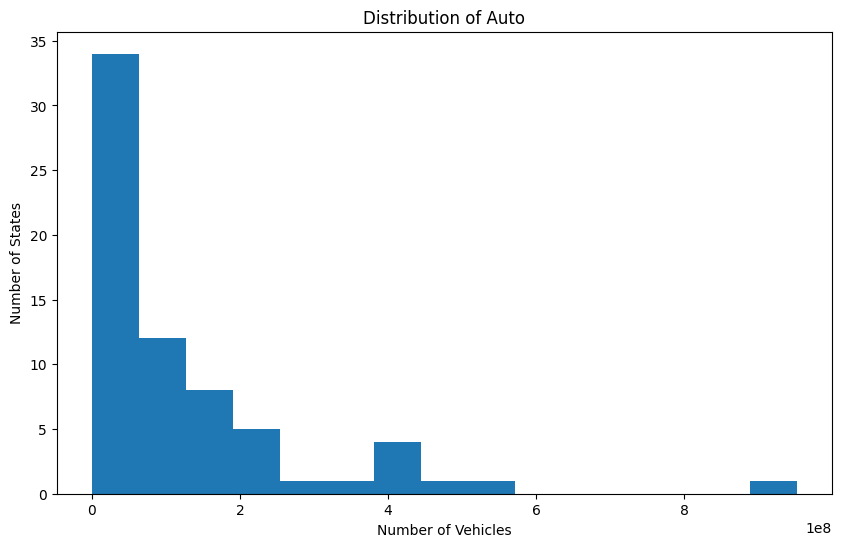

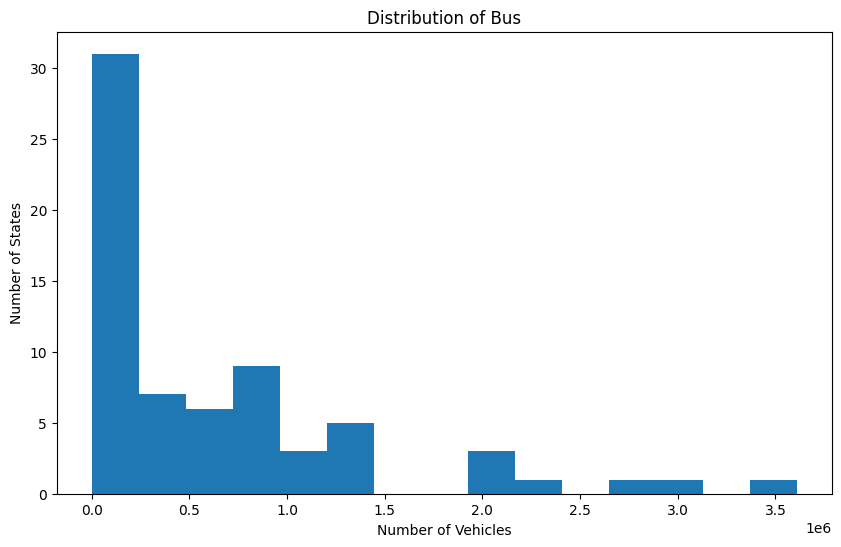

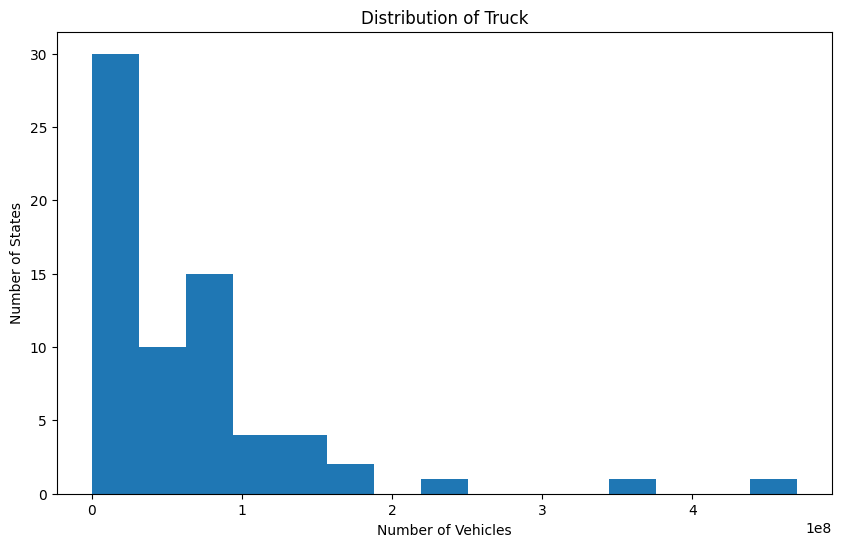

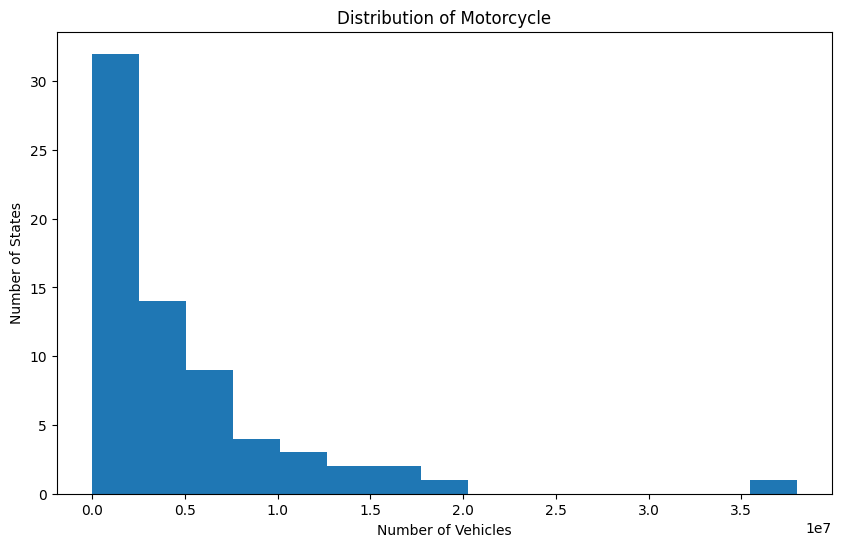

In [22]:
newdf = pd.read_csv('Motor_Vehicle_Registrations_Dashboard_data_after_cleaing.csv')
df_agg = newdf.groupby('state')[['Auto', 'Bus', 'Truck', 'Motorcycle']].sum().reset_index()
# Create target variable
df_agg['target'] = df_agg[['Auto', 'Bus', 'Truck', 'Motorcycle']].idxmax(axis=1)
print(df_agg)

# Plot histogram for each type of vehicle
for vehicle in ['Auto', 'Bus', 'Truck', 'Motorcycle']:
    plt.figure(figsize=(10, 6))
    plt.hist(df_agg[vehicle], bins=15)
    plt.title(f'Distribution of {vehicle}')
    plt.xlabel('Number of Vehicles')
    plt.ylabel('Number of States')
    plt.show()